# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [24]:
import pandas as pd


Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [25]:
baby_names = pd.read_csv("./lab12_files/US_Baby_Names_right.csv")
#typ danych
print(baby_names.dtypes)
print('\n')

Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object




Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [26]:
#pierwsze 10 rekordów
print(baby_names.head(10))

   Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [27]:
print(baby_names.head(10).drop(columns=['Unnamed: 0','Id']))

       Name  Year Gender State  Count
0      Emma  2004      F    AK     62
1   Madison  2004      F    AK     48
2    Hannah  2004      F    AK     46
3     Grace  2004      F    AK     44
4     Emily  2004      F    AK     41
5   Abigail  2004      F    AK     37
6    Olivia  2004      F    AK     33
7  Isabella  2004      F    AK     30
8    Alyssa  2004      F    AK     29
9    Sophia  2004      F    AK     28


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [28]:
f_names=baby_names['Gender'].value_counts()['F']
m_names=baby_names['Gender'].value_counts()['M']
if f_names>m_names:
    print(f'Więcej jest imion żeńskich-{f_names} niz męskich-{m_names}')
else:
    print(f'Więcej jest imion męskich-{m_names} niz żeńskich-{f_names}')

Więcej jest imion żeńskich-558846 niz męskich-457549


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [29]:
most_popular_names=baby_names['Name'].value_counts().head(10)
print(most_popular_names)

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: count, dtype: int64


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

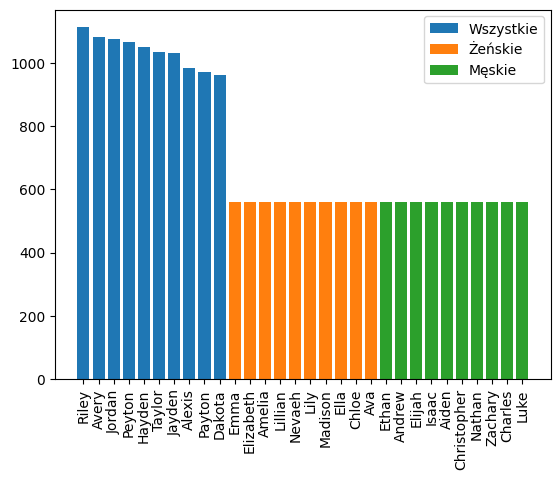

In [30]:
import numpy as np
import matplotlib.pyplot as plt

most_popular_names=baby_names['Name'].value_counts().head(10)
most_popular_fnames=baby_names[baby_names["Gender"] == "F"]["Name"].value_counts().head(10)
most_popular_mnames=baby_names[baby_names["Gender"] == "M"]["Name"].value_counts().head(10)

fig, ax = plt.subplots()
ax.bar(most_popular_names.index, most_popular_names.values, label="Wszystkie")
ax.bar(most_popular_fnames.index, most_popular_fnames.values, label="Żeńskie")
ax.bar(most_popular_mnames.index, most_popular_mnames.values, label="Męskie")
plt.xticks(rotation=90)
plt.legend()
plt.show()


Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [31]:
print(len(baby_names['Name'].unique()))

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [32]:
name_distribution=baby_names['Name'].value_counts(normalize=True)
def random_name():
    return np.random.choice(name_distribution.index,p=name_distribution.values)

print(random_name())


Anamarie


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [33]:
print(f"Najczęstsze imie: {name_distribution.idxmax()}")
print(f"Średnia: {name_distribution.mean()}")
print(f"Mediana: {name_distribution.median()}")
print(f"Odchylenie standardowe {name_distribution.std()}")


Najczęstsze imie: Riley
Średnia: 5.6715063520871134e-05
Mediana: 7.870955681600165e-06
Odchylenie standardowe 0.00012006155432498086


## Część II

Krok 1: Wczytaj dane

In [9]:
import pandas as pd
ocupation = pd.read_csv("./lab12_files/ocupation.csv",sep='|')

Krok 2: Podejrzyj pierwsze 25 rekordów

In [10]:
print(ocupation.head(25))

    user_id  age gender     occupation zip_code
0         1   24      M     technician    85711
1         2   53      F          other    94043
2         3   23      M         writer    32067
3         4   24      M     technician    43537
4         5   33      F          other    15213
5         6   42      M      executive    98101
6         7   57      M  administrator    91344
7         8   36      M  administrator    05201
8         9   29      M        student    01002
9        10   53      M         lawyer    90703
10       11   39      F          other    30329
11       12   28      F          other    06405
12       13   47      M       educator    29206
13       14   45      M      scientist    55106
14       15   49      F       educator    97301
15       16   21      M  entertainment    10309
16       17   30      M     programmer    06355
17       18   35      F          other    37212
18       19   40      M      librarian    02138
19       20   42      F      homemaker  

Krok 3: Podejrzyj ostatnie 10 rekordów

In [11]:
print(ocupation.tail(10))

     user_id  age gender     occupation zip_code
933      934   61      M       engineer    22902
934      935   42      M         doctor    66221
935      936   24      M          other    32789
936      937   48      M       educator    98072
937      938   38      F     technician    55038
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [12]:
num_of_columns = len(ocupation.columns)
num_of_rows = len(ocupation.index)
print(f'Liczba kolumn: {num_of_columns}, liczba wierszy: {num_of_rows}')

Liczba kolumn: 5, liczba wierszy: 943


Krok 5: Wypisz nazwy kolumn

In [14]:
print(ocupation.columns.values)

['user_id' 'age' 'gender' 'occupation' 'zip_code']


Krok 6: Ile różnych zawodów jest w zbiorze?

In [16]:
print(len(ocupation['occupation'].unique()))

21


Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

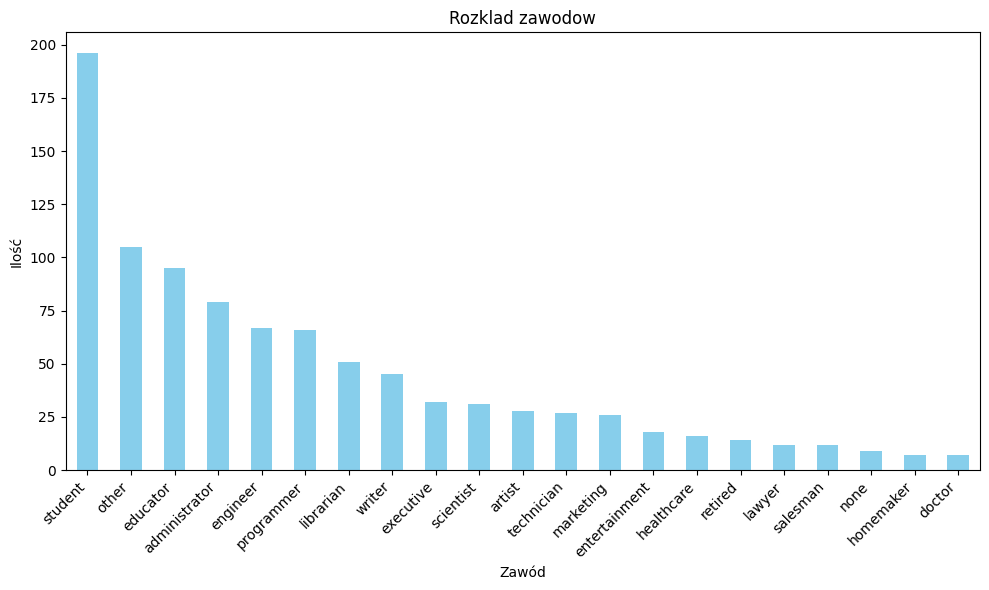

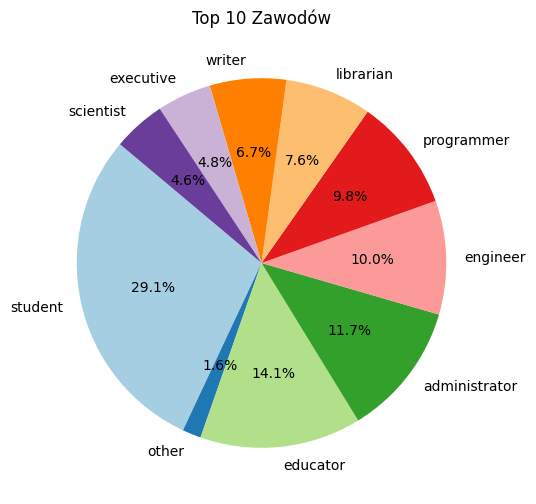

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ocupation['occupation'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Rozklad zawodow')
plt.xlabel('Zawód')
plt.ylabel('Ilość')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

top_10_occupations = ocupation['occupation'].value_counts().nlargest(10)
other_occupations_count = ocupation['occupation'].nunique() - 10
top_10_occupations['other'] = other_occupations_count

plt.figure(figsize=(10, 6))
plt.pie(top_10_occupations, labels=top_10_occupations.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Zawodów')
plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

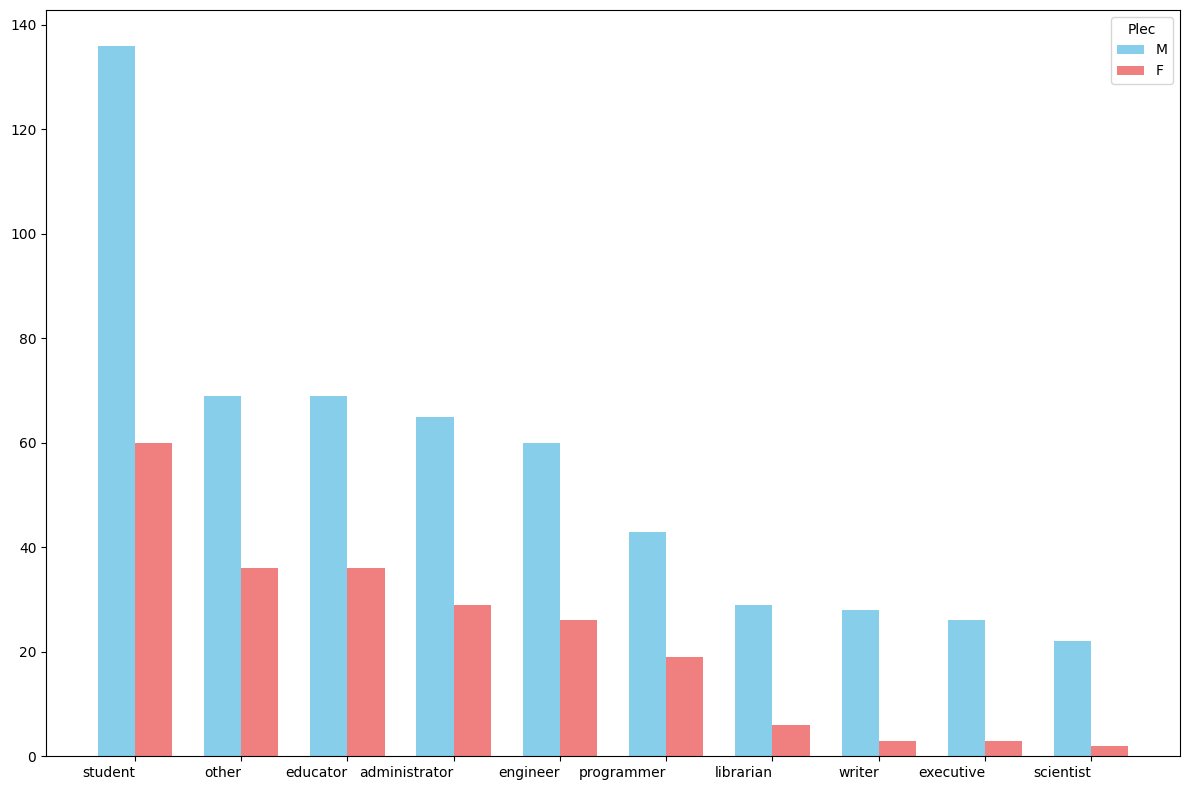

In [37]:
import numpy as np

occupation = ocupation.dropna(subset=['gender'])

top_10_occupations = occupation['occupation'].value_counts().nlargest(10).index
top_10_data = occupation[occupation['occupation'].isin(top_10_occupations)]

plt.figure(figsize=(12, 8))
colors = {'M': 'skyblue', 'F': 'lightcoral'}

bar_width = 0.35
bar_positions = np.arange(len(top_10_occupations))

colors = {'M': 'skyblue', 'F': 'lightcoral'}

for i, (gender, color) in enumerate(colors.items()):
    gender_data = top_10_data[top_10_data['gender'] == gender]
    occupation_counts = gender_data['occupation'].value_counts()
    
    plt.bar(bar_positions + i * bar_width, occupation_counts, bar_width, color=color, label=gender)

plt.legend(title='Plec')
plt.xticks(bar_positions + bar_width / 2, top_10_occupations, ha='right')
plt.tight_layout()
plt.show()

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

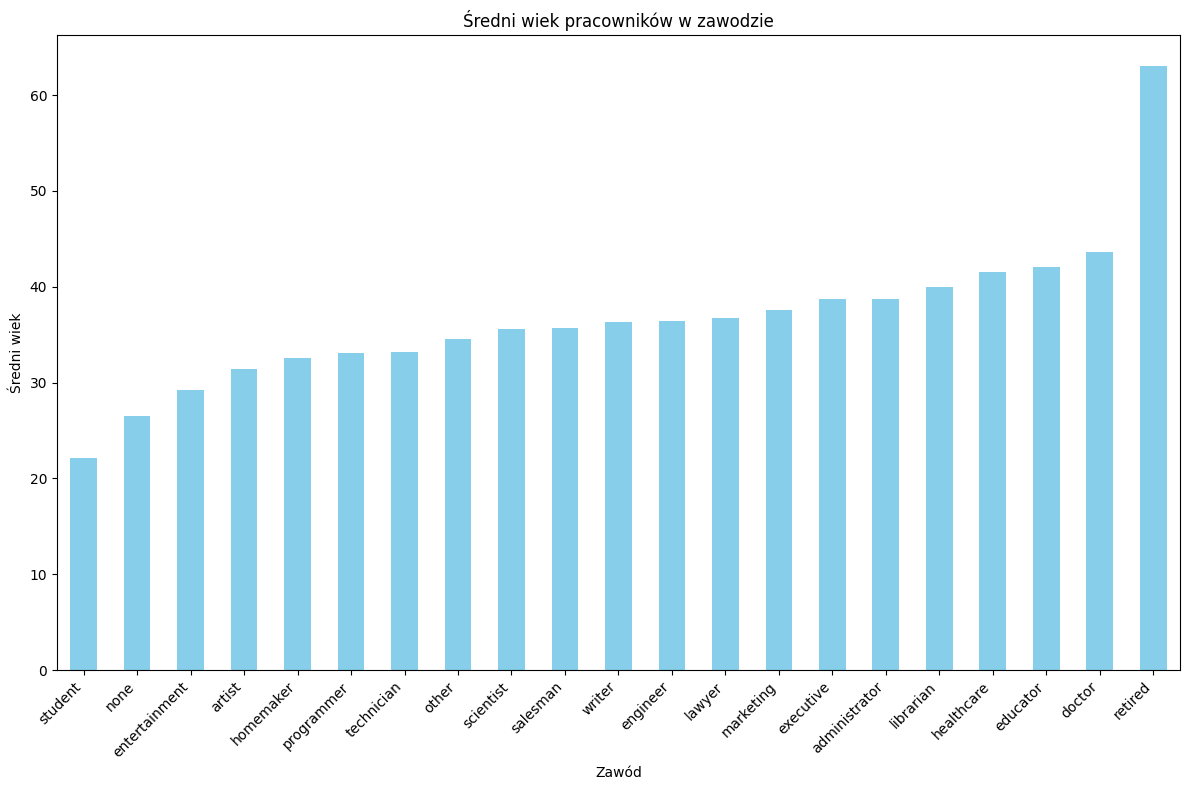

In [40]:
occupation = occupation.dropna(subset=['age'])

average_age_by_occupation = occupation.groupby('occupation')['age'].mean()

plt.figure(figsize=(12, 8))
average_age_by_occupation.sort_values().plot(kind='bar', color='skyblue')

plt.title('Średni wiek pracowników w zawodzie')
plt.xlabel('Zawód')
plt.ylabel('Średni wiek')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

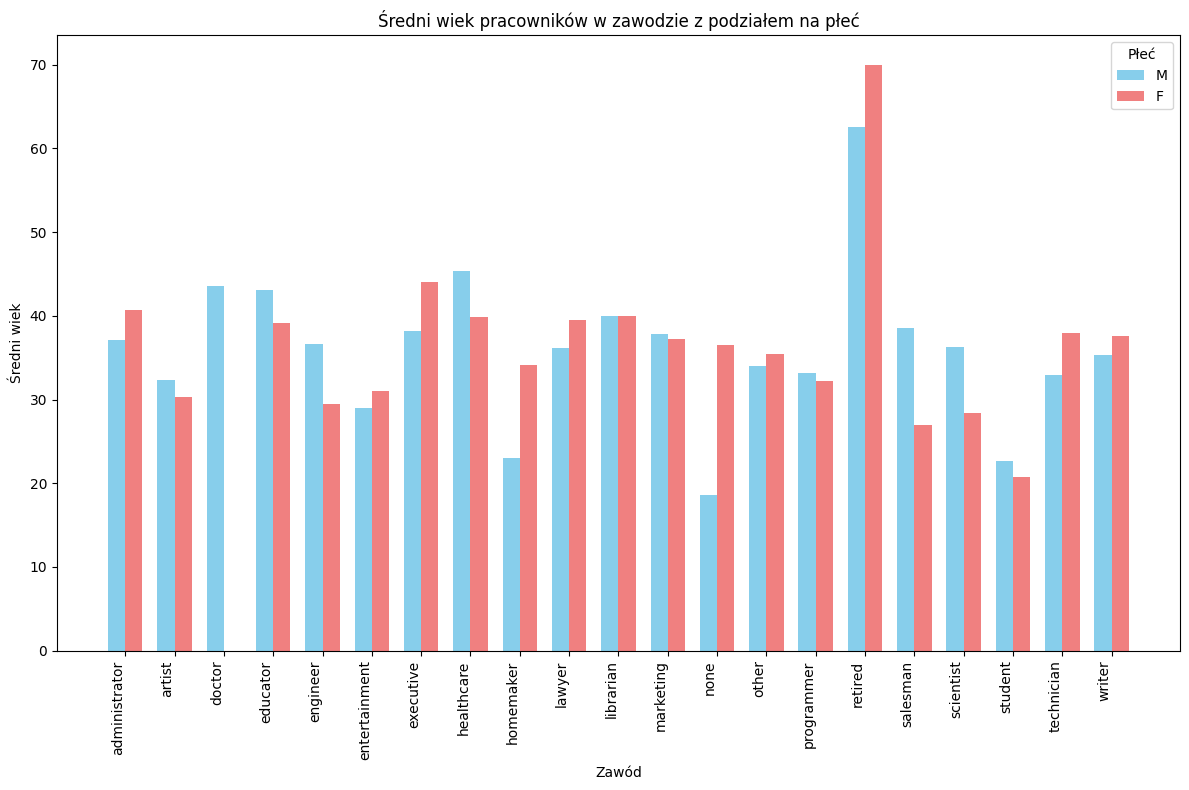

In [42]:
occupation = occupation.dropna(subset=['age', 'gender'])

average_age_by_occupation_gender = occupation.groupby(['occupation', 'gender'])['age'].mean().unstack()

plt.figure(figsize=(12, 8))

bar_width = 0.35
bar_positions = np.arange(len(average_age_by_occupation_gender.index))

colors = {'M': 'skyblue', 'F': 'lightcoral'}

for i, (gender, color) in enumerate(colors.items()):
    plt.bar(bar_positions + i * bar_width, average_age_by_occupation_gender[gender], bar_width, color=color, label=gender)

plt.title('Średni wiek pracowników w zawodzie z podziałem na płeć')
plt.xlabel('Zawód')
plt.ylabel('Średni wiek')
plt.legend(title='Płeć')
plt.xticks(bar_positions + bar_width / 2, average_age_by_occupation_gender.index, rotation=90, ha='right')
plt.tight_layout()
plt.show()